Llamar desde google drive

In [1]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [2]:
%cd /content/MyDrive/My Drive/

/content/MyDrive/My Drive


In [3]:
%cd face-mask-detector

/content/MyDrive/My Drive/face-mask-detector


In [4]:
!ls

dataset  dataset-r  examples  face_detector  model


llamar desde github

Librerias

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse 
import os

In [7]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("Cargando imagenes ...")
imagePaths = list(paths.list_images('dataset-r/'))
#dataset/with_mask/
# imagePaths =['with_mask', 'withput_mask']
data = []
labels = []


Cargando imagenes ...


In [ ]:
# from IPython.display import Image
# Image('dataset-r/with_mask/0_0_0 copy 10.jpg')

In [8]:
# ciclo para recorrer las rutas de las imagenes
# image = cv2.imread(imagePath)
# label = imagePath.split(os.path.sep)[-1].split(".")[0]
# features = image_to_feature_vector(image)
# print(imagePaths)
for imagePath in imagePaths:
	# extrae la etiqueta de la clase del nombre del archivo
	label = imagePath.split(os.path.sep)[-2]
	# cargar la imagen de entrada (224x224) y la preprocesa
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
  #para el modelo
	image = preprocess_input(image)

	# actualizar las listas de datos y etiquetas
	data.append(image)
	labels.append(label)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Manejo de variables

In [9]:
real_name_labels=labels

In [10]:
real_name_labels

['without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask

In [11]:
# convert the data and labels to NumPy arrays
data = np.array(data, dtype="float32")

In [ ]:
# labels = np.array(labels) for two types

In [ ]:
# realizar una codificación one-hot en las etiquetas / para dos tipos
# lb = LabelBinarizer()
# labels = lb.fit_transform(labels)
# labels = to_categorical(labels)

In [12]:
data

array([[[[-0.85882354, -0.85882354, -0.8745098 ],
         [-0.85882354, -0.85882354, -0.8745098 ],
         [-0.85882354, -0.85882354, -0.8745098 ],
         ...,
         [-0.6156863 , -0.67058825, -0.73333335],
         [-0.6156863 , -0.67058825, -0.73333335],
         [-0.6392157 , -0.69411767, -0.75686276]],

        [[-0.85882354, -0.85882354, -0.8745098 ],
         [-0.85882354, -0.85882354, -0.8745098 ],
         [-0.85882354, -0.85882354, -0.8745098 ],
         ...,
         [-0.6156863 , -0.67058825, -0.73333335],
         [-0.6156863 , -0.67058825, -0.73333335],
         [-0.6392157 , -0.69411767, -0.75686276]],

        [[-0.8745098 , -0.8745098 , -0.8901961 ],
         [-0.8745098 , -0.8745098 , -0.8901961 ],
         [-0.8745098 , -0.8745098 , -0.8901961 ],
         ...,
         [-0.6313726 , -0.6862745 , -0.7490196 ],
         [-0.6313726 , -0.6862745 , -0.7490196 ],
         [-0.62352943, -0.6784314 , -0.7411765 ]],

        ...,

        [[ 0.827451  ,  0.92941177,  0

In [13]:
#one-hot encoder - mas tipos de clases
# codificar valores de clase 
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)
# one hot encoded
labels_n = np_utils.to_categorical(encoded_labels)

In [14]:
labels=labels_n 
labels

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [15]:
labels.shape

(4137, 3)

In [16]:
data.shape

(4137, 224, 224, 3)

In [ ]:
# #reshape 
# labels_rs = labels#labels.reshape(3832,3*224*224)
# data_rs = data#data.reshape(3832,3*224*224)

In [ ]:
# labels_rs=labels.reshape(labels.shape[0], -1)
# labels_new = labels.reshape((labels.shape[0]*labels.shape[1]), labels.shape[2])

In [ ]:
# nsamples, nx, ny = labels.shape
# labels_new = labels.reshape((nsamples,nx*ny))

In [17]:
# particiona los datos en divisiones de entrenamiento y prueba utilizando el 80% de
# los datos para entrenamiento y el 20% restante para pruebas
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

In [18]:
# se construye el generador de imágenes de entrenamiento para el aumento de datos
# genera lotes de datos de imágenes de tensores con aumento de datos en tiempo real.
aug = ImageDataGenerator(
      rotation_range=20,
      zoom_range=0.15,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.15,
      horizontal_flip=True,
      fill_mode="nearest")


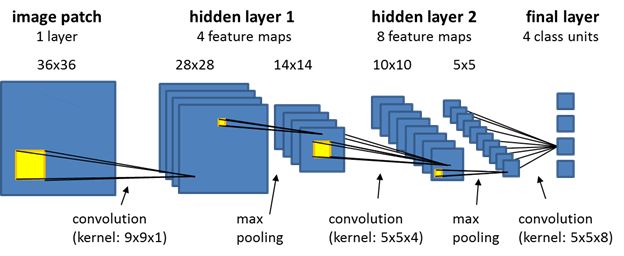

In [19]:
# modelo MobileNetV2 de keras, quitar la opcion predefinida de FC
#Red Neuronal Convolucional
#tres capas
#1 convolution - ReLU6
#2 depthwise convolution.
#3 convolucion pero sin  ReLU
#Permite carga pesos previamente entrenados en ImageNet
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

9412608/9406464 [==============================] - 0s 0us/step


In [20]:
# construye la cabeza del modelo que se colocará en la parte superior de la red
# modelo base
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
# evita el sobreajuste
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

In [21]:
# se juntan las partes del modelo creado
#  y este sera el modelo que real se entrenara
model = Model(inputs=baseModel.input, outputs=headModel)

In [22]:
# recorra todas las capas del modelo base y las congela para que no se actualicen durante el primer proceso de formación
# La congelación de una capa también es una técnica para acelerar el entrenamiento de la red neuronal,
# CNN
for layer in baseModel.layers:
	layer.trainable = False

In [23]:
# inicializar la tasa de aprendizaje inicial, el número de épocas para entrenar y el tamaño del lote
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [24]:
# compile our model
print("compilación del modelo...")
#función de optimización
# cambiar ?
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# primer intento de dos tipo uso de binary_crossentropy, cambiar a categorical_crossentropy para multiples clases
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["categorical_accuracy","accuracy"])

compilación del modelo...


In [26]:

# entrenamiento de la red
print("Entrenando...")
# BS=32
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

Entrenando...
Epoch 1/20
103/103 [==============================] - 169s 2s/step - loss: 0.1407 - categorical_accuracy: 0.9496 - accuracy: 0.9496 - val_loss: 0.1651 - val_categorical_accuracy: 0.9408 - val_accuracy: 0.9408
Epoch 2/20
103/103 [==============================] - 170s 2s/step - loss: 0.1375 - categorical_accuracy: 0.9503 - accuracy: 0.9503 - val_loss: 0.1703 - val_categorical_accuracy: 0.9348 - val_accuracy: 0.9348
Epoch 3/20
103/103 [==============================] - 168s 2s/step - loss: 0.1295 - categorical_accuracy: 0.9521 - accuracy: 0.9521 - val_loss: 0.1590 - val_categorical_accuracy: 0.9420 - val_accuracy: 0.9420
Epoch 4/20
103/103 [==============================] - 169s 2s/step - loss: 0.1284 - categorical_accuracy: 0.9503 - accuracy: 0.9503 - val_loss: 0.1633 - val_categorical_accuracy: 0.9420 - val_accuracy: 0.9420
Epoch 5/20
103/103 [==============================] - 169s 2s/step - loss: 0.1247 - categorical_accuracy: 0.9512 - accuracy: 0.9512 - val_loss: 0.1707

In [28]:
# realiza predicciones en el conjunto de pruebas
print("Evaluacion de la red neuronal")
predIdxs = model.predict(testX, batch_size=BS) 
predIdxs

Evaluacion de la red neuronal


array([[2.10655387e-02, 9.78847563e-01, 8.69420983e-05],
       [2.83264206e-04, 7.82662188e-04, 9.98934090e-01],
       [4.06941772e-03, 9.95925546e-01, 5.08039375e-06],
       ...,
       [1.47996545e-02, 9.85076368e-01, 1.24031430e-04],
       [4.42751072e-04, 9.99556482e-01, 6.68874350e-07],
       [3.27547826e-03, 1.08702499e-02, 9.85854208e-01]], dtype=float32)

In [29]:
# para cada imagen en el conjunto de prueba, se necesita encontrar el índice de la
# etiqueta con la mayor probabilidad predicha correspondiente
predIdxs = np.argmax(predIdxs, axis=1)

In [30]:
predIdxs 

array([1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 2,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 0, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 2,
       1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 1,
       2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2,

In [31]:
#clases obtenidas anteriomente
encoder.classes_

array(['bad_mask', 'with_mask', 'without_mask'], dtype='<U12')

In [32]:
# reporte de clasificación
print(classification_report(testY.argmax(axis=1), predIdxs,target_names=encoder.classes_))

              precision    recall  f1-score   support

    bad_mask       0.79      0.65      0.71        82
   with_mask       0.91      0.97      0.94       362
without_mask       1.00      0.98      0.99       384

    accuracy                           0.94       828
   macro avg       0.90      0.87      0.88       828
weighted avg       0.94      0.94      0.94       828



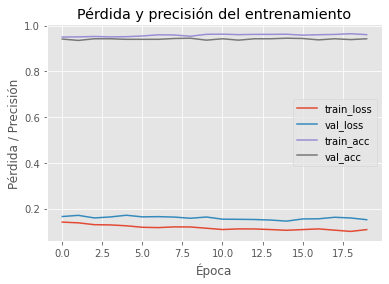

In [33]:
# pérdida de entrenamiento y precisión
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Pérdida y precisión del entrenamiento")
plt.xlabel("Época")
plt.ylabel("Pérdida / Precisión")
plt.legend(loc="center right")

In [34]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [35]:
model_name = "fmd_mobilenetv2"
model.save(f"models/{model_name}.h5")

In [36]:
# librerias 
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import cv2
import os
from google.colab.patches import cv2_imshow

In [57]:
%cd ../../../

/content


In [58]:
%cd content/

[Errno 2] No such file or directory: 'content/'
/content


In [59]:
!ls

examples  MyDrive  sample_data


In [197]:
# load the input image from disk, clone it, and grab the image spatial
# dimensions
import cv2
from matplotlib import pyplot as plt
# image = cv2.imread('examples/example_02.png')
#Import image
#5
image = cv2.imread('/content/examples/prueba_0.PNG')

# Muestra la imagen con matplotlib
# plt.imshow(image)
# plt.show()

In [198]:
orig = image.copy()
(h, w) = image.shape[:2]

In [199]:
# construye un blob de la imagen
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),(104.0, 177.0, 123.0))

In [50]:
%cd /content/MyDrive/My Drive/face-mask-detector

/content/MyDrive/My Drive/face-mask-detector


In [ ]:
#detección de caras usando un modelo pre-entrenado
net=cv2.dnn.readNet('face_detector/deploy.prototxt','face_detector/res10_300x300_ssd_iter_140000.caffemodel')

In [200]:
# pasar el blob a través de la red y obtiene las deteccion de los rostros
print("Detección de rostros...")
net.setInput(blob)
detections = net.forward()

Detección de rostros...


In [201]:
from skimage import io
# ciclos para las detecciones
for i in range(0, detections.shape[2]):
    # confianza de la detección
    confidence = detections[0, 0, i, 2]
    
    # filtrar las detecciones para asegurar, mayor confianza 
    if confidence > 0.17:
        # calcula las coordenadas (x, y) del  bounding box 
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # asegura que el bounding boxes cae dentro de las dimensiones del marco
        (startX, startY) = (max(0, startX), max(0, startY))
        (endX, endY) = (min(w - 1, endX), min(h - 1, endY))
        
        # convierte BGR a RGB
        # ordena, cambia el tamaño de la imagen a 224x224, y las preprocesa
        face = image[startY:endY, startX:endX]
        face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        face = cv2.resize(face, (224, 224))
        face = img_to_array(face)
        face = preprocess_input(face)
        face = np.expand_dims(face, axis=0)
        # print(model.predict(face)[0])
        # pasa la cara a través del modelo de deteccion de cubrebocas para determinar 
        # la clase
        print(model.predict(face)[0])
        (bad_mask, mask,  withoutMask) = model.predict(face)[0]
        
        # determinar la etiqueta de clase y el color que se usara para dibujar para dibujar
        # la bounding box y el texto
        if bad_mask > mask and bad_mask > withoutMask:
            label = "Bad mask" 
        elif mask > bad_mask and mask > withoutMask:
              label = "Mask"
        else: 
              label= "No Mask"
        if label=="Bad mask":
              color=(255, 132, 0) 
        elif label=="Mask":
              color = (0, 255, 0) 
        else:
              color = (0, 0, 255)

        # probabilidad de precisión
        label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

        # mostrar la etiqueta y el rectángulo del cuadro delimitador en la salida
        # frame
        cv2.putText(image, label, (startX, startY - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
        cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)


[7.6072727e-05 1.0288153e-06 9.9992287e-01]
[0.22459792 0.02762987 0.7477722 ]
[0.6211175  0.00441886 0.3744636 ]


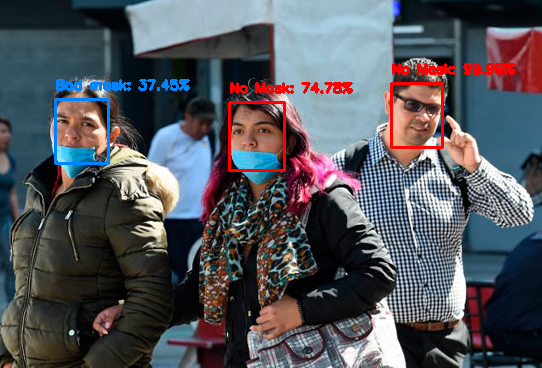

-1

In [202]:
cv2_imshow(image)
cv2.waitKey(0)

In [ ]:
# librerias
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from imutils.video import VideoStream
import numpy as np
import argparse
import imutils
import time
import cv2
import os

In [ ]:


def detect_and_predict_mask(frame, faceNet, maskNet):
	# toma las dimensiones del marco y luego construye un blob
	(h, w) = frame.shape[:2]
	blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300),
		(104.0, 177.0, 123.0))

	# pasa el blob a través de la red y obtener las detecciones de rostros
	faceNet.setInput(blob)
	detections = faceNet.forward()

	# inicializa la lista de caras, sus ubicaciones correspondientes,
	# y la lista de predicciones 
	faces = []
	locs = []
	preds = []

	# loop over the detections
	for i in range(0, detections.shape[2]):
		# probabilidad de confianza
		confidence = detections[0, 0, i, 2]

		# filtrar las detecciones débiles
		if confidence > 0.5:
			# coordenadas del bounding box
			box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
			(startX, startY, endX, endY) = box.astype("int")

			# dimensiones bounding 
			(startX, startY) = (max(0, startX), max(0, startY))
			(endX, endY) = (min(w - 1, endX), min(h - 1, endY))

			# preproceso
			face = frame[startY:endY, startX:endX]
			face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
			face = cv2.resize(face, (224, 224))
			face = img_to_array(face)
			face = preprocess_input(face)

			# agrega la cara y los cuadros delimitadores respectivamente
			faces.append(face)
			locs.append((startX, startY, endX, endY))

	# hace la prediccion si se detecto al menos una cara
	if len(faces) > 0:
		faces = np.array(faces, dtype="float32")
		preds = maskNet.predict(faces, batch_size=32)

  #devuelve una tupla 2 de las ubicaciones de las caras y sus correspondientes ubicaciones
	return (locs, preds)


In [ ]:
faceNet=cv2.dnn.readNet('face_detector/deploy.prototxt','face_detector/res10_300x300_ssd_iter_140000.caffemodel')

video

In [ ]:
import base64
import html
import io
import time

from IPython.display import display, Javascript
from google.colab.output import eval_js
import numpy as np
from PIL import Image
import cv2

def start_input():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 800, 512);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }
      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '800px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);
      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();
      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 800; //video.videoWidth;
      captureCanvas.height = 800; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function takePhoto(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }
      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
#la simulacion toma una foto del video
def take_photo(label, img_data):
  data = eval_js('takePhoto("{}", "{}")'.format(label, img_data))
  return data

In [ ]:
def js_reply_to_image(js_reply):
    """
    input: 
          js_reply: JavaScript object, contain image from webcam
    output: 
          image_array: image array RGB size 512 x 512 from webcam
    """
    jpeg_bytes = base64.b64decode(js_reply['img'].split(',')[1])
    image_PIL = Image.open(io.BytesIO(jpeg_bytes))
    image_array = np.array(image_PIL)

    return image_array

In [ ]:
import imutils
start_input()
label_html = 'Capturando...'
img_data = ''
count = 0 
from google.colab.patches import cv2_imshow
while True:
  js_reply = take_photo(label_html, img_data)
  if not js_reply:
    break
    
  image = js_reply_to_image(js_reply)

	# toma frame from del video y le cambia el tamaño
	# ancho máximo de 400 píxeles
  frame = image
  v=True
  if v == True:

    frame = imutils.resize(frame, width=400)

    # detectar rostros
    # modelo para cubrebocas
    (locs, preds) = detect_and_predict_mask(frame, faceNet, model)
    for (box, pred) in zip(locs, preds):


		# cuadro delimitador y las predicciones
      (startX, startY, endX, endY) = box
      ( bad_mask, mask, withoutMask) = pred
        
      if bad_mask > mask and bad_mask > withoutMask:
            label = "Bad mask" 
      elif mask > bad_mask and mask > withoutMask:
            label = "Mask"
      else: 
            label= "No Mask"
      if label=="Bad mask":
            color=(255, 132, 0) 
      elif label=="Mask":
            color = (0, 255, 0) 
      else:
           color = (0, 0, 255)

      #   (mask, withoutMask) = pred
      #   label = "Mask" if mask > withoutMask else "No Mask"
      #   color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

      # confianza
      label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

	
      frame=cv2.putText(frame, label, (startX, startY - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
      frame=cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)
      #mostrar resultado
      cv2_imshow(frame)

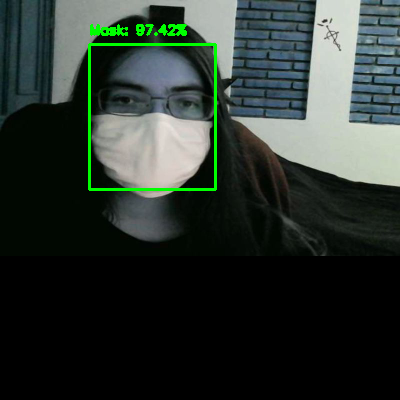

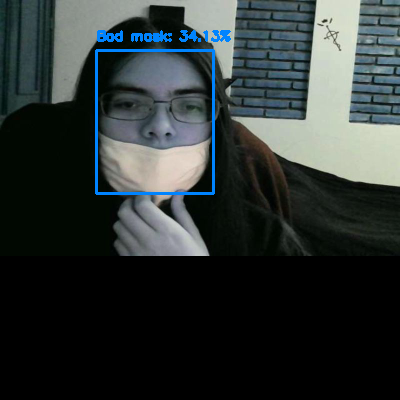

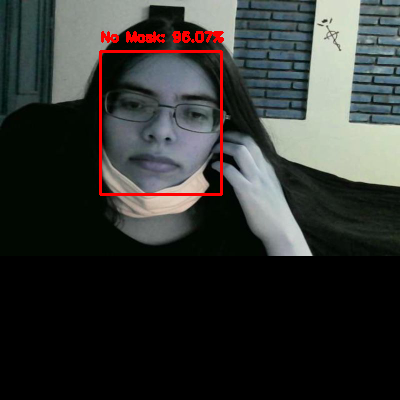